In [ ]:
import psycopg2
# import jsonlines
# import networkx as nx
import psycopg2
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
from dotenv import load_dotenv
import os
from matplotlib.ticker import StrMethodFormatter

In [ ]:
# Load environment variables from .env file
load_dotenv(dotenv_path='/cardano-viz-practice/backend/backend/.env')

True

In [10]:
conn = psycopg2.connect(database=os.getenv('DB_CARDANO_NAME'), user=os.getenv('DB_CARDANO_USER'), password=os.getenv('DB_CARDANO_PASSWORD'), host=os.getenv('DB_CARDANO_HOST'), port="5432")

In [11]:
cur = conn.cursor()

In [32]:
def epoch_to_datetime(epoch_no):
    # Cardano epoch starts on 2017-09-23
    epoch_start = pd.Timestamp('2017-09-23')
    # Each epoch is 5 days long
    epoch_duration = pd.Timedelta(days=5)
    return epoch_start + (epoch_no * epoch_duration)

<h2>Number of stake pools over epochs</h2>

In [22]:
cur.execute("SELECT epoch_no, count(pool_id) AS pool_count FROM pool_stats_summary GROUP BY epoch_no ORDER BY epoch_no;")

In [ ]:
stake_pools = pd.DataFrame(cur.fetchall(), columns=['epoch_no', 'pool_count'])
stake_pools["start"] = pd.epoch_to_datetime(stake_pools['epoch_no'])
stake_pools_fil = stake_pools.iloc[1:-1]

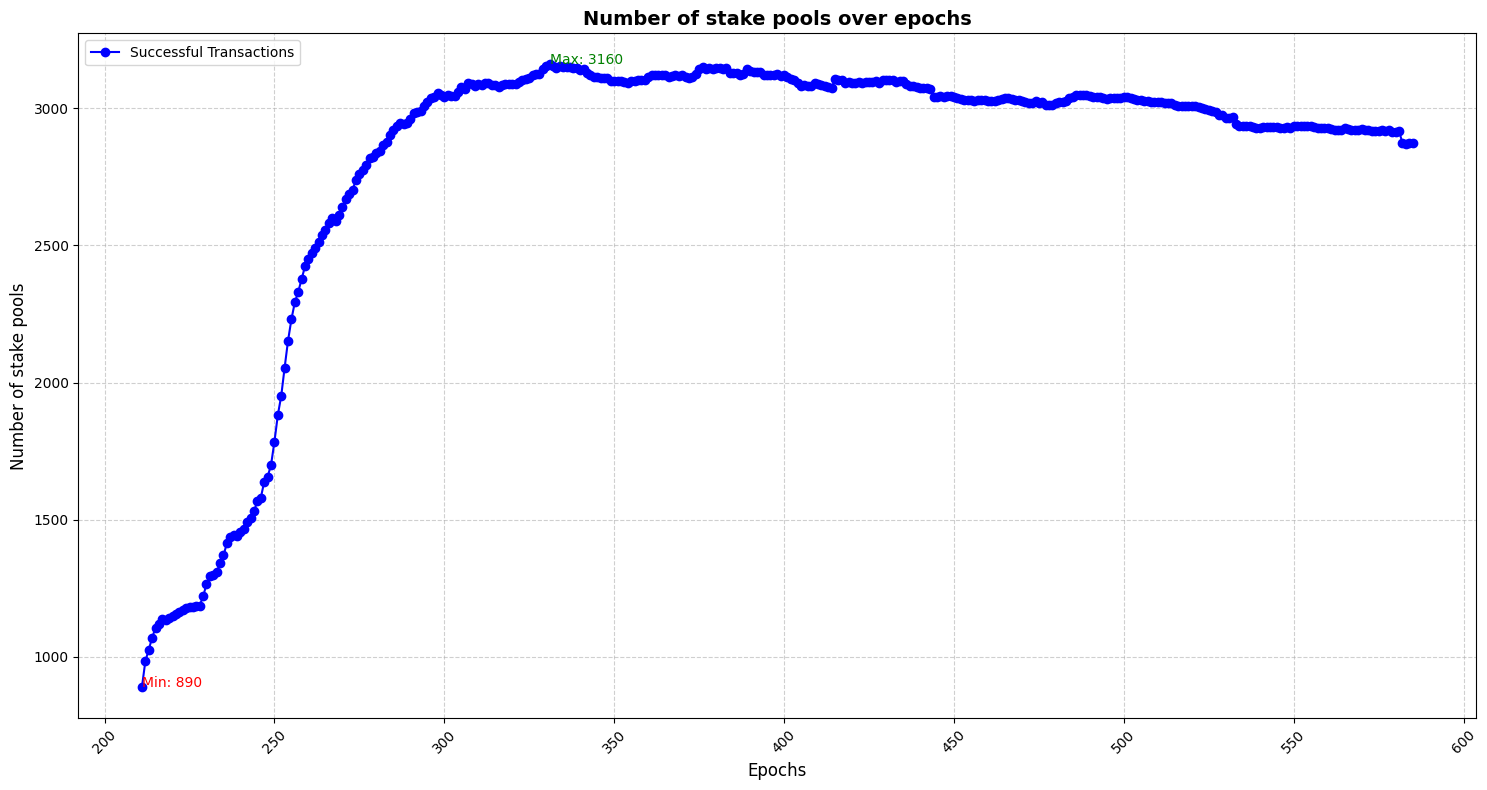

In [ ]:
plt.figure(figsize=(15, 8))

plt.plot(stake_pools_fil['epoch_no'], stake_pools_fil['pool_count'], marker='o', linestyle='-', label='Number of stake pools', color='blue')

max_val = stake_pools_fil['pool_count'].max()
max_epoch = stake_pools_fil.loc[stake_pools_fil['pool_count'].idxmax(), 'epoch_no']
plt.text(max_epoch, max_val, f'Max: {max_val}', fontsize=10, color='green')

min_val = stake_pools_fil['pool_count'].min()
min_epoch = stake_pools_fil.loc[stake_pools_fil['pool_count'].idxmin(), 'epoch_no']
plt.text(min_epoch, min_val, f'Min: {min_val}', fontsize=10, color='red')

plt.xticks(rotation=45) 
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10)) 

plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Number of stake pools', fontsize=12)
plt.title('Number of stake pools over epochs', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<h2>Number of delegators over epochs</h2>

<h2>Total active stake over epochs</h2>

In [28]:
cur.execute("SELECT epoch_no, total_active_stake / 1000000 as total_active_stake FROM epoch_summary ORDER BY epoch_no;")

In [29]:
active_stake = pd.DataFrame(cur.fetchall(), columns=['epoch_no', 'total_active_stake'])
active_stake_fil = active_stake.iloc[1:-1]

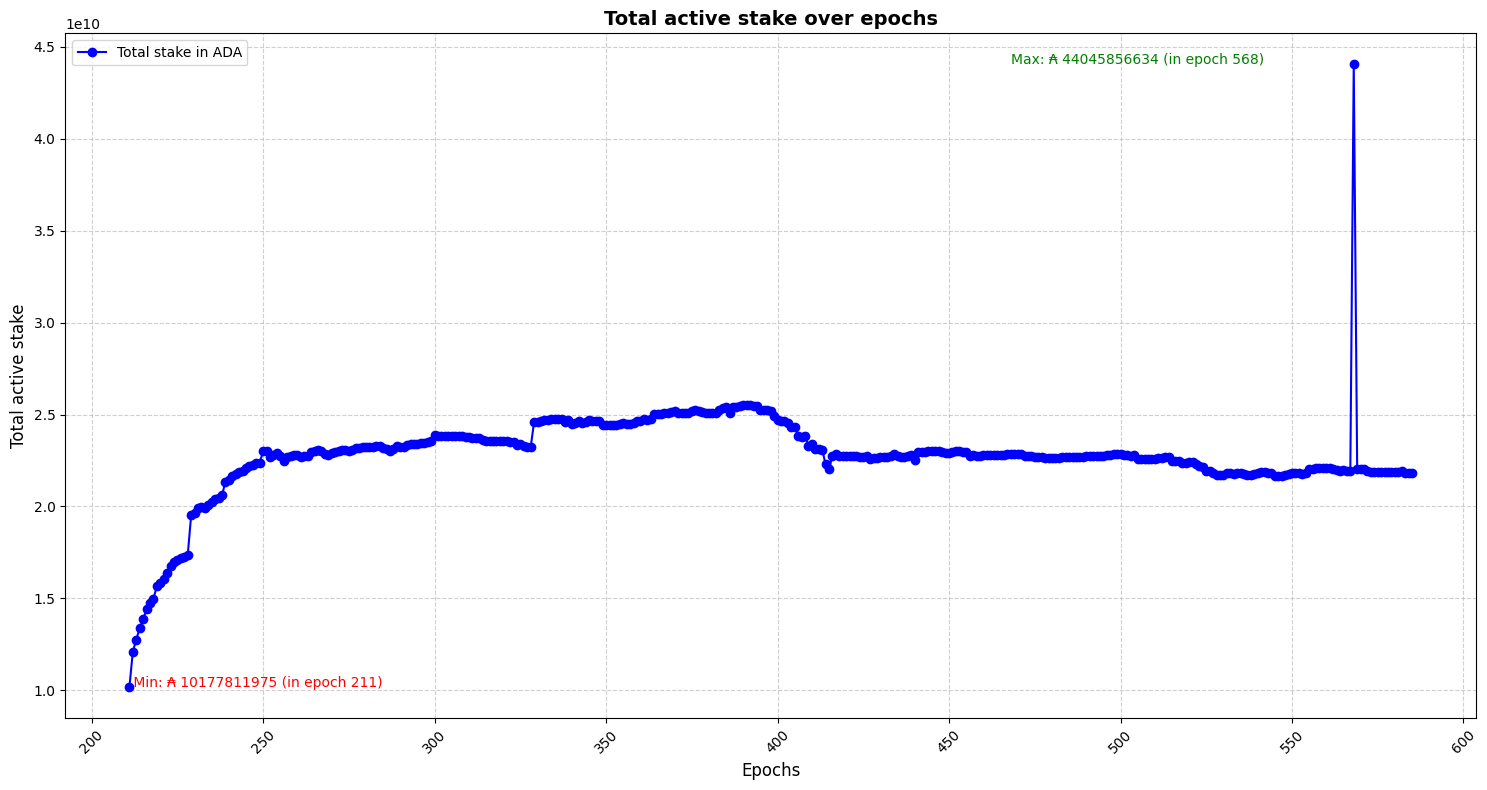

In [97]:
plt.figure(figsize=(15, 8))

plt.plot(active_stake_fil['epoch_no'], active_stake_fil['total_active_stake'], marker='o', linestyle='-', label='Total stake in ADA', color='blue')

max_val = active_stake_fil['total_active_stake'].max()
max_epoch = active_stake_fil.loc[active_stake_fil['total_active_stake'].idxmax(), 'epoch_no']
plt.text(max_epoch-100, max_val, f'Max: ₳ {round(max_val)} (in epoch {max_epoch})', fontsize=10, color='green')

min_val = active_stake_fil['total_active_stake'].min()
min_epoch = active_stake_fil.loc[active_stake_fil['total_active_stake'].idxmin(), 'epoch_no']
plt.text(min_epoch, min_val, f' Min: ₳ {round(min_val)} (in epoch {min_epoch})', fontsize=10, color='red')

plt.xticks(rotation=45) 
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10)) 

plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Total active stake', fontsize=12)
plt.title('Total active stake over epochs', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<h2>Total transactions over epoch</h2>

<h2>Total delegation transactions over epoch</h2>

In [ ]:
cur = conn.cursor()

In [37]:
cur.execute("SELECT b.epoch_no, count(tx.id) as tx_count FROM tx JOIN block b ON b.id = tx.block_id WHERE b.epoch_no IS NOT NULL GROUP BY b.epoch_no;")

In [38]:
all_tx = pd.DataFrame(cur.fetchall(), columns=['epoch_no', 'tx_count'])
all_tx_fil = all_tx.iloc[1:-1]

In [44]:
cur.execute("SELECT epoch_no, count(tx_id) AS del_tx_count FROM delegation_summary GROUP BY epoch_no ORDER BY epoch_no;")

In [45]:
del_tx = pd.DataFrame(cur.fetchall(), columns=['epoch_no', 'del_tx_count'])
del_tx_fil = del_tx.iloc[1:-1]

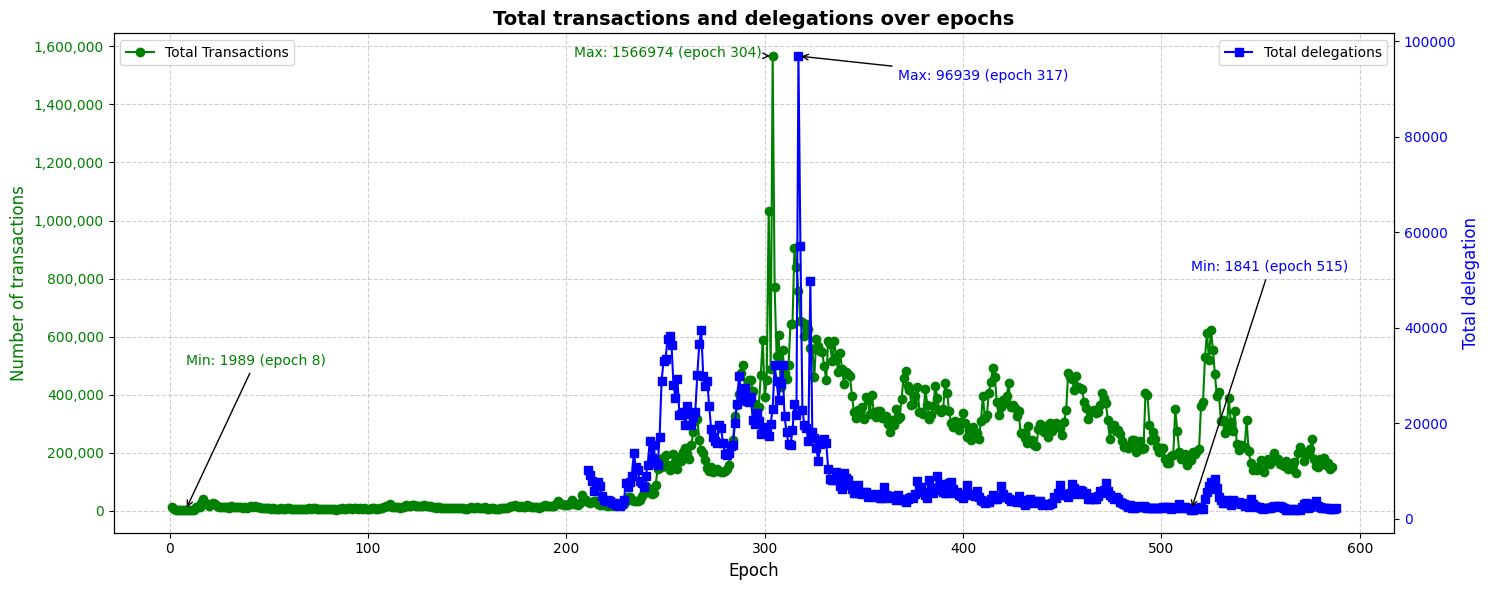

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot Average Finality Time (Green)
color = 'green'
ax1.plot(all_tx_fil['epoch_no'], all_tx_fil['tx_count'], marker='o', linestyle='-', color=color, label='Total Transactions')
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Number of transactions', color=color, fontsize=12)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.6)

min_all_tx_count = all_tx_fil['tx_count'].min()
max_all_tx_count = all_tx_fil['tx_count'].max()
min_all_tx_epoch = all_tx_fil.loc[all_tx_fil['tx_count'].idxmin(), 'epoch_no']
max_all_tx_epoch = all_tx_fil.loc[all_tx_fil['tx_count'].idxmax(), 'epoch_no']

ax1.annotate(f'Min: {min_all_tx_count} (epoch {min_all_tx_epoch})',
             xy=(min_all_tx_epoch, min_all_tx_count), 
             xytext=(min_all_tx_epoch, min_all_tx_count + 500000),  
             arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=10, color='green')
ax1.annotate(f'Max: {max_all_tx_count} (epoch {max_all_tx_epoch})',
             xy=(max_all_tx_epoch, max_all_tx_count), 
             xytext=(max_all_tx_epoch - 100, max_all_tx_count - 5000),  
             arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=10, color='green')

ax1.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax2 = ax1.twinx()
color = 'blue'
ax2.plot(del_tx_fil['epoch_no'], del_tx_fil['del_tx_count'], marker='s', linestyle='-', color=color, label='Total delegations')
ax2.set_ylabel('Total delegation', color=color, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color)


min_del_tx_count = del_tx_fil['del_tx_count'].min()
max_del_tx_count = del_tx_fil['del_tx_count'].max()
min_del_tx_epoch = del_tx_fil.loc[del_tx_fil['del_tx_count'].idxmin(), 'epoch_no']
max_del_tx_epoch = del_tx_fil.loc[del_tx_fil['del_tx_count'].idxmax(), 'epoch_no']

ax2.annotate(f'Min: {min_del_tx_count} (epoch {min_del_tx_epoch})',
             xy=(min_del_tx_epoch, min_del_tx_count), 
             xytext=(min_del_tx_epoch, min_del_tx_count + 50000),  
             arrowprops=dict(facecolor='blue', arrowstyle='->'), fontsize=10, color='blue')
ax2.annotate(f'Max: {max_del_tx_count} (epoch {max_del_tx_epoch})',
             xy=(max_del_tx_epoch, max_del_tx_count), 
             xytext=(max_del_tx_epoch + 50, max_del_tx_count - 5000),  
             arrowprops=dict(facecolor='blue', arrowstyle='->'), fontsize=10, color='blue')

plt.title('Total transactions and delegations over epochs', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()